In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_blobs, load_digits, load_iris
from scipy.stats import norm
from scipy.integrate import simpson
from sklearn.model_selection import train_test_split
from sklearn.metrics import (f1_score,accuracy_score, confusion_matrix, ConfusionMatrixDisplay, euclidean_distances)
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

In [4]:
NOISE= 0.1
N_SAMPLES=1000
ALPHA=0.001 #


params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)
plt.style.use('seaborn-v0_8-darkgrid')
TEST_SIZE=0.2;


<Figure size 1500x500 with 0 Axes>

In [5]:
##helper function
def fn_plot_decision_boundary(clf,X1,y1,ax=None):
    '''
    Args:
        clf:classifier
        X1: np.ndarray - Feature matrix
        y1 : np.ndarray - labels/targets
        ax: matplotlib axis object
    '''
    if ax is None:
        ax= plt.gca()

    dm = 0.05

    x_min, x_max = X1[:,0].min()-0.5, X1[:,0].max()+0.5 # Col 1

    y_min, y_max = X1[:,1].min()-0.5, X1[:,1].max()+0.5 # Col 2

    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))

    # Stack them
    XX = np.c_[xx.ravel(), yy.ravel()]

    # Make Predictions
    y_pred = clf.predict(XX)

    # Assign predictions to be respect point
    Z = y_pred.reshape(xx.shape)

    ax.contourf(xx,yy, Z, alpha=0.6, cmap=CMAP)
    ax.scatter(X1[:,0], X1[:,1], c=y,s=20, edgecolor='k', cmap=CMAP)
    return

In [6]:
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
display(arr)
arr0=np.zeros_like(arr)
display(arr0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [7]:
def fn_plot_svc_decision_function(clf):
    x=np.linspace(plt.xlim()[0],plt.xlim()[1],30)
    y=np.linspace(plt.ylim()[0],plt.ylim()[1],30)

    YY,XX = np.meshgrid(y,x)

    P=np.zeros_like(XX)
    for i, xi in enumerate(x):
        for j,yj in enumerate(y):
            P[i,j]= clf.decision_function(np.array([xi,yj]).reshape(1,-1))[0]
    return plt.contour(XX,YY, P,colors='k',
                        levels=[-1,0,1],
                        linestyles=['--','-','--'])

In [8]:
data_df = pd.read_csv('Dataset/boston_house_price.csv')

In [9]:
data_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
X,y = make_blobs(n_samples = 60, centers =2, random_state=RANDOM_STATE, cluster_std=0.6)
X.shape,y.shape

((60, 2), (60,))

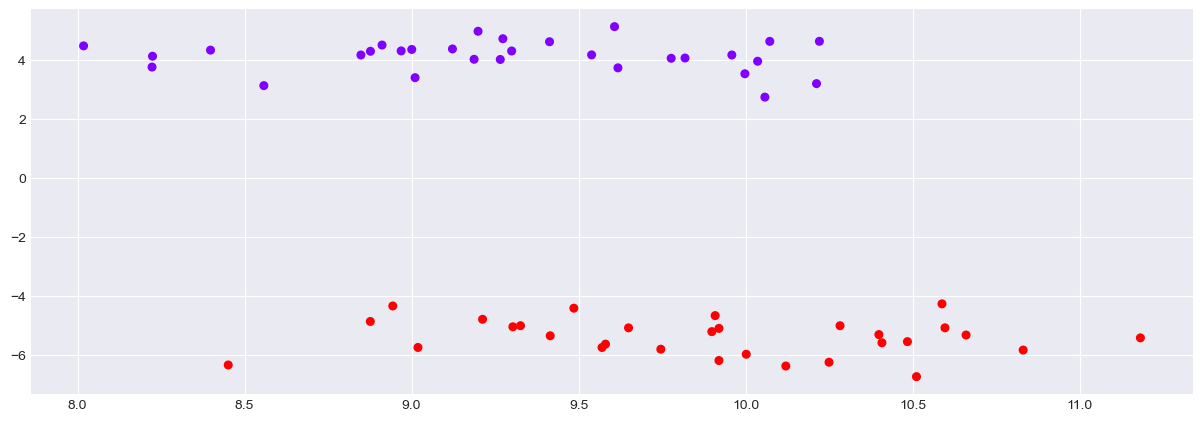

In [11]:
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=CMAP)

In [12]:
clf= SVC(kernel='linear')
clf.fit(X,y)

SVC(kernel='linear')

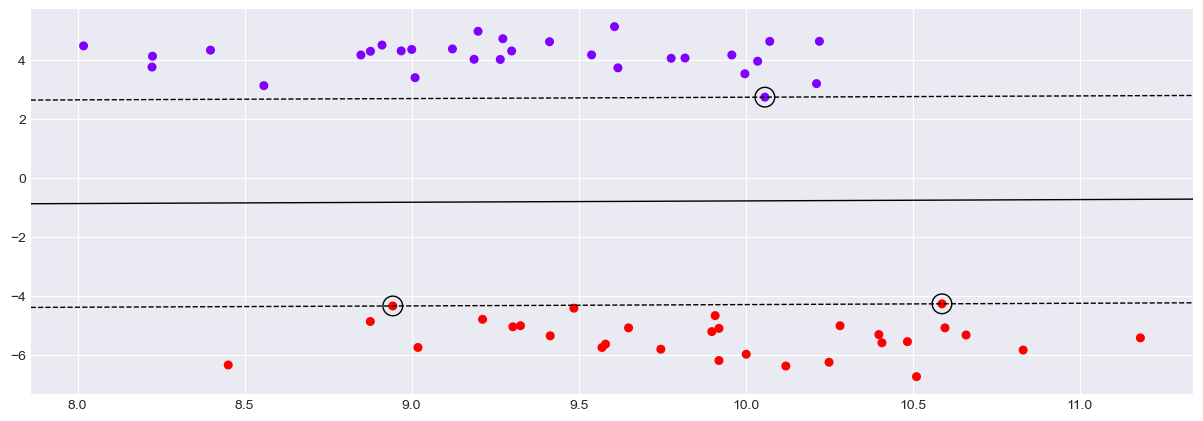

In [13]:
## plot
plt.scatter(X[:,0],X[:,1],c=y,s=30,cmap=CMAP)

fn_plot_svc_decision_function(clf=clf)

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            s=200, facecolor ='none', edgecolors='k')

USING DIGITS DATSET

In [15]:
digits= load_digits()
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [16]:
X= digits.data
y=digits.target

In [17]:
X.shape

(1797, 64)

In [18]:
digits.images.shape

(1797, 8, 8)

In [19]:
plot_X= digits.images[:32]
plot_X.shape

(32, 8, 8)

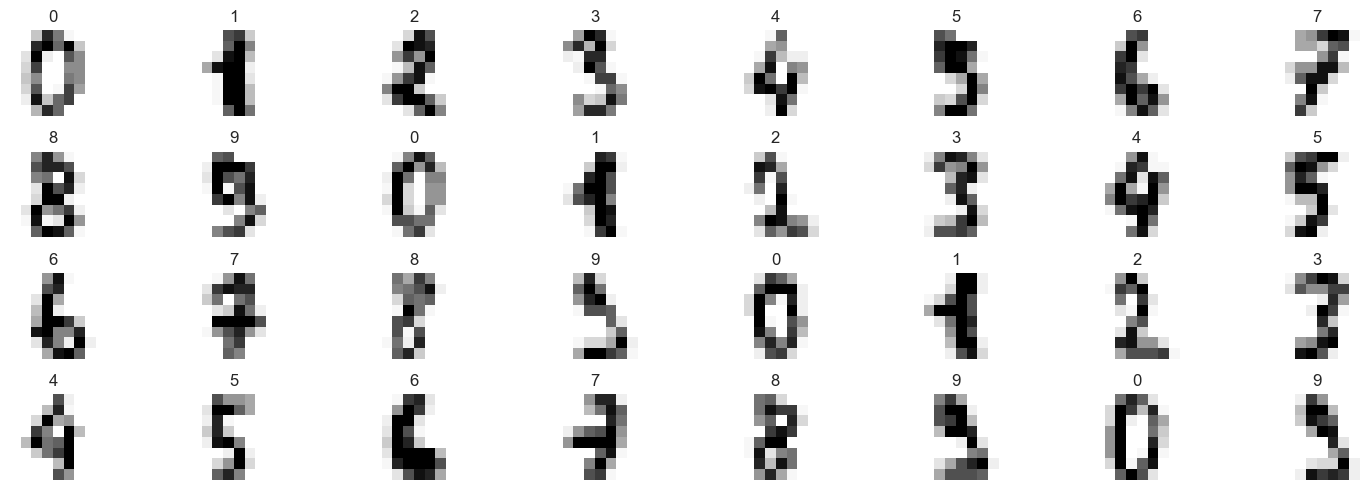

In [20]:
fig, axes = plt.subplots(4,8)

axes= axes.ravel()

for count, ax in enumerate(axes):
    ax.imshow(digits.images[count])
    ax.set_title(y[count])
    ax.axis('off')
plt.tight_layout()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE)

SVC: kernel: linear |F1 Score: 0.9776607203045559
SVC: kernel: rbf    |F1 Score: 0.9860662724950834
SVC: kernel: poly   |F1 Score: 0.9916467661691541


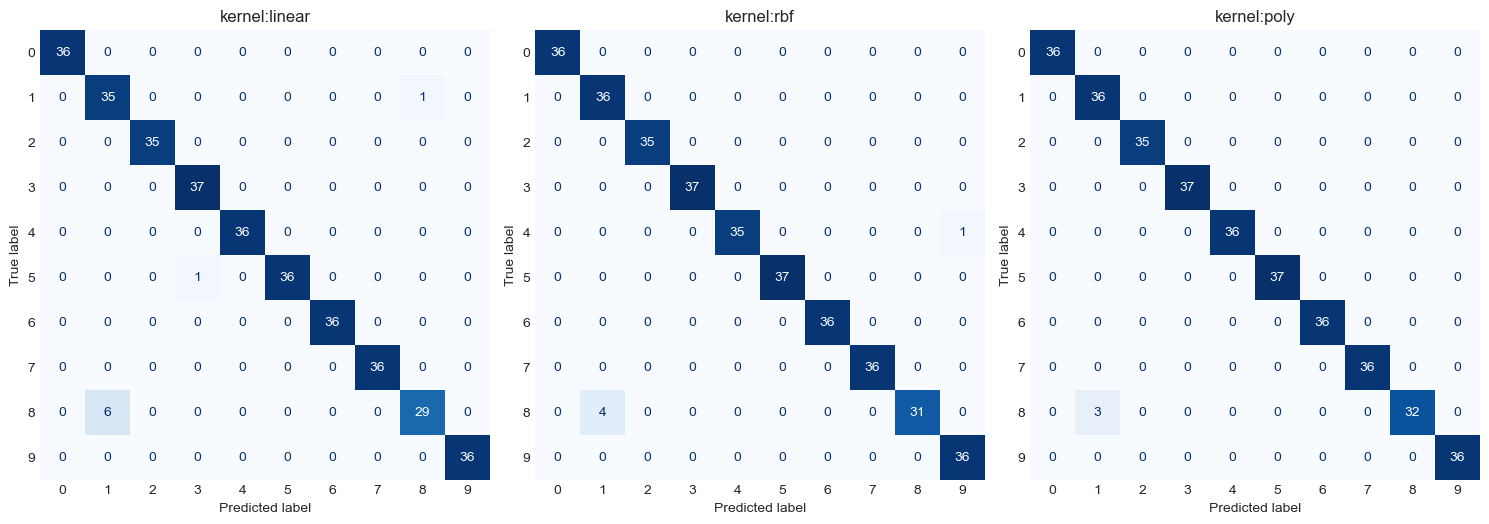

In [22]:
fig, axes = plt.subplots(1,3, figsize = (15,8))

for i, kernel in enumerate(['linear','rbf','poly']):
    clf=SVC(kernel=kernel).fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f'SVC: kernel: {kernel:<7s}', end='|')
    print(f'F1 Score: {f1_score(y_true=y_test,y_pred=y_pred,average="weighted")}')
    cm=confusion_matrix(y_true=y_test, y_pred=y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=digits.target_names)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, colorbar=False)
    axes[i].set_title(f'kernel:{kernel}')
    axes[i].grid()
plt.tight_layout()

### Linear & Non-Linear Models & Features

In [24]:
X, y = make_blobs(centers=4, random_state=RANDOM_STATE)
y=y%2

In [25]:
y.shape

(100,)

array([ True,  True,  True, False, False, False, False,  True,  True,
       False,  True, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True,  True,  True,  True,
       False, False,  True, False,  True,  True, False, False, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False, False,  True, False, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False])

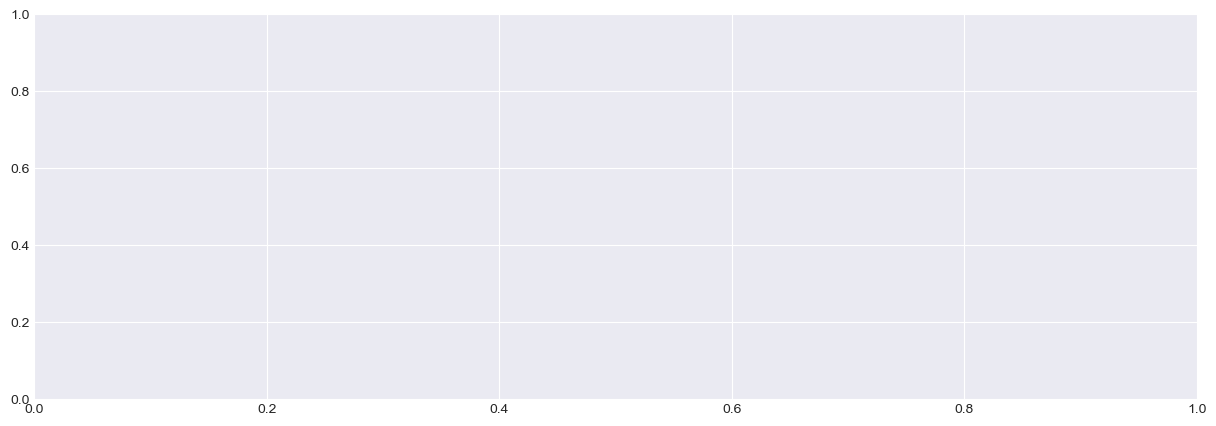

In [26]:
fig,ax = plt.subplots()
mask=y==0
mask

<function matplotlib.pyplot.show(close=None, block=None)>

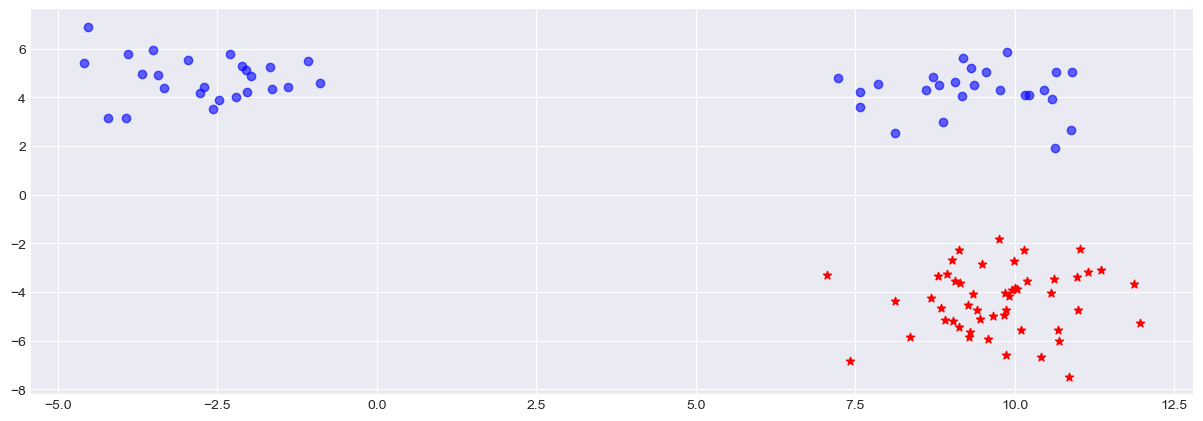

In [27]:
fig,ax = plt.subplots()
mask=y==0 #comparing y with 0

ax.scatter(X[mask, 0], X[mask,1], c='b', alpha=0.6) 
ax.scatter(X[~mask, 0], X[~mask,1], c='r', marker='*')
plt.show

In [28]:
#plt.scatter?

In [29]:
import sklearn
sklearn.__version__

'1.4.2'

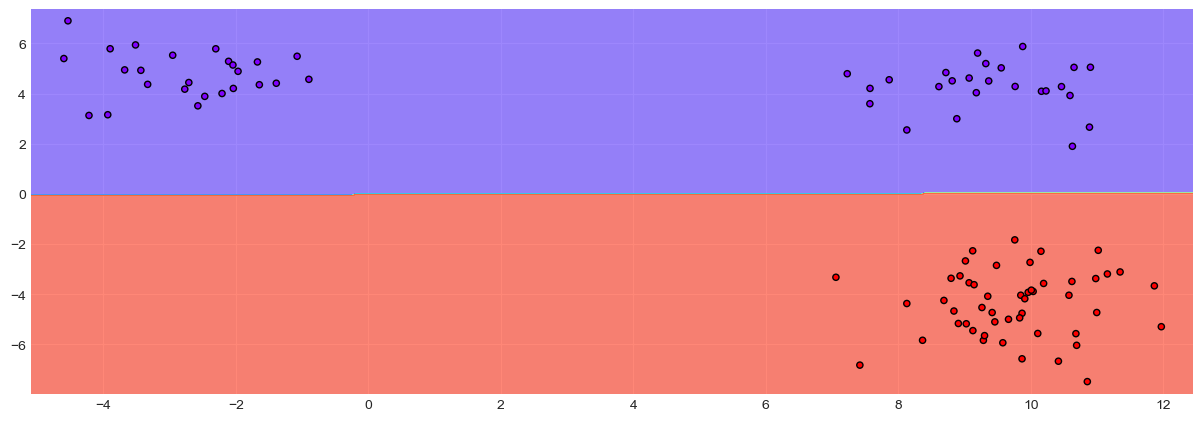

In [30]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(dual = 'auto', random_state=RANDOM_STATE)
linear_svc.fit(X,y)

fn_plot_decision_boundary(linear_svc, X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

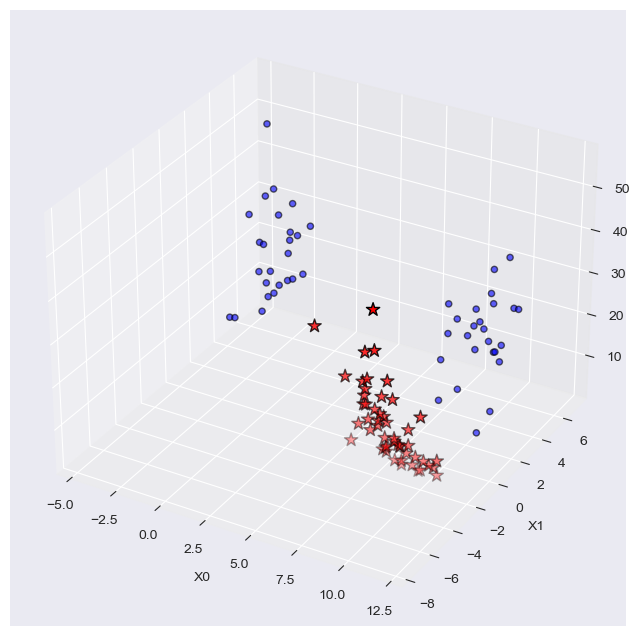

In [31]:
X_new = np.hstack([X,X[:,1:]**2]) # creating 3d data

from mpl_toolkits.mplot3d import Axes3D, axes3d # importing 3d plotting
ax=plt.figure(figsize=(8,8)).add_subplot(projection='3d') # creating a 3d Axis

mask=y==0 # comparing y with 0

ax.scatter(X_new[mask,0], X_new[mask,1], X_new[mask,2],
          c='b', alpha=0.6, edgecolor='k') # mask = Tru

ax.scatter(X_new[~mask,0], X_new[~mask,1], X_new[~mask,2],
          c='r', marker='*', s=100, edgecolor='k') # Mask = False

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('X1**2')

plt.show

In [32]:
clf= SVC (kernel='linear')

clf.fit(X_new, y)

y_pred = clf.predict(X_new)

accuracy_score(y_true=y, y_pred=y_pred)

1.0

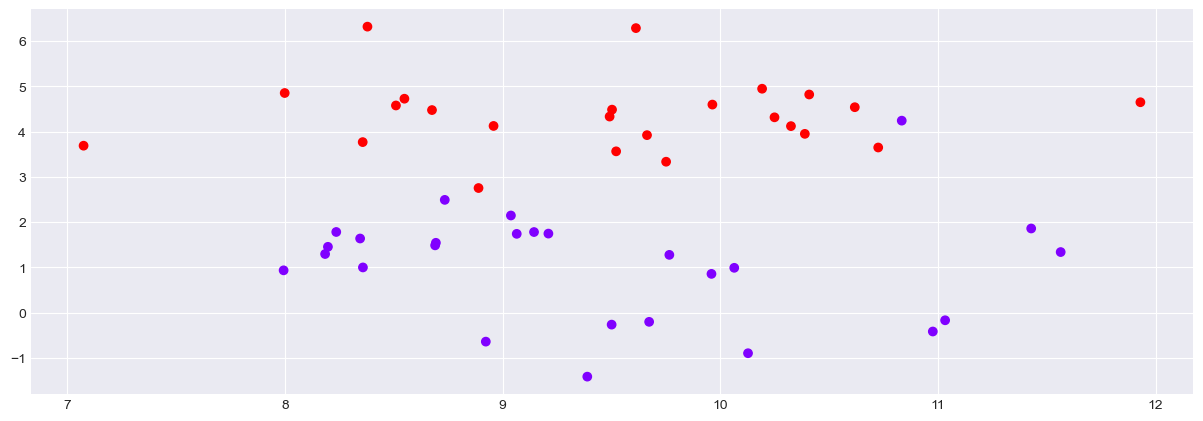

In [33]:
X,y = make_blobs(centers=2, random_state=4, n_samples=50)

y[np.array([2,27])]=0

mask = np.ones(len(X))

mask = np.ma.make_mask(mask)

mask[np.array([0,1,5,26])]==0

X,y = X[mask], y[mask]

fig, ax=plt.subplots()

mask = y == 1

ax.scatter(X[:,0], X[:,1], c=y, cmap=CMAP)

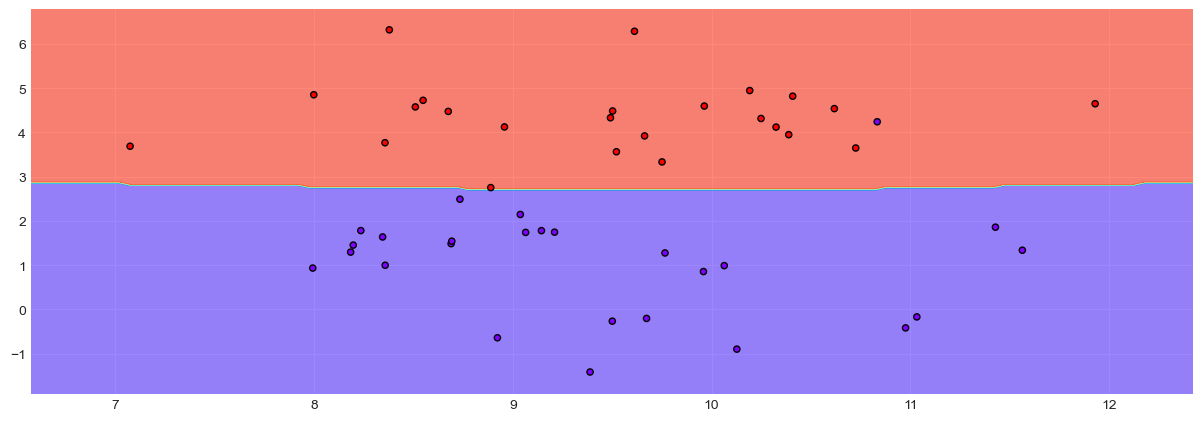

In [34]:
svm=SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)

fn_plot_decision_boundary(svm, X,y)

In [35]:
X.min(axis=0)

array([ 7.07391193, -1.41342865])

In [36]:
X

array([[ 9.1438515 ,  1.78117369],
       [ 8.8888119 ,  2.75339082],
       [ 8.34468785,  1.63824349],
       [ 8.92229526, -0.63993225],
       [ 7.99313649,  0.93528488],
       [ 8.19679821,  1.45456477],
       [11.563957  ,  1.3389402 ],
       [ 9.5211582 ,  3.56405517],
       [ 9.66300069,  3.92187496],
       [10.61787476,  4.53898003],
       [10.06393839,  0.99078055],
       [ 9.61215674,  6.28640289],
       [ 8.35656532,  3.7681238 ],
       [ 8.37839711,  6.31872494],
       [ 9.50048972, -0.26430318],
       [ 9.76566918,  1.27689813],
       [ 8.68937095,  1.48709629],
       [ 8.35760513,  0.99907772],
       [10.12719906, -0.89623088],
       [ 9.03763281,  2.14664757],
       [ 9.20989214,  1.7467316 ],
       [10.24892115,  4.31540984],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [11.93027136,  4.64866327],
       [ 9.50229021,  4.48496608],
       [ 9.06439343,  1.74115688],
       [10.8336073 ,  4.24176117],
       [ 8.54824906,

### Load Iris Dataset

In [38]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
X=iris['data']
y=iris['target']
target_names = iris['target_names']

In [40]:

features = pd.DataFrame(X, columns=iris['feature_names'])


In [41]:
features = pd.DataFrame(X, columns=iris['feature_names'])
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


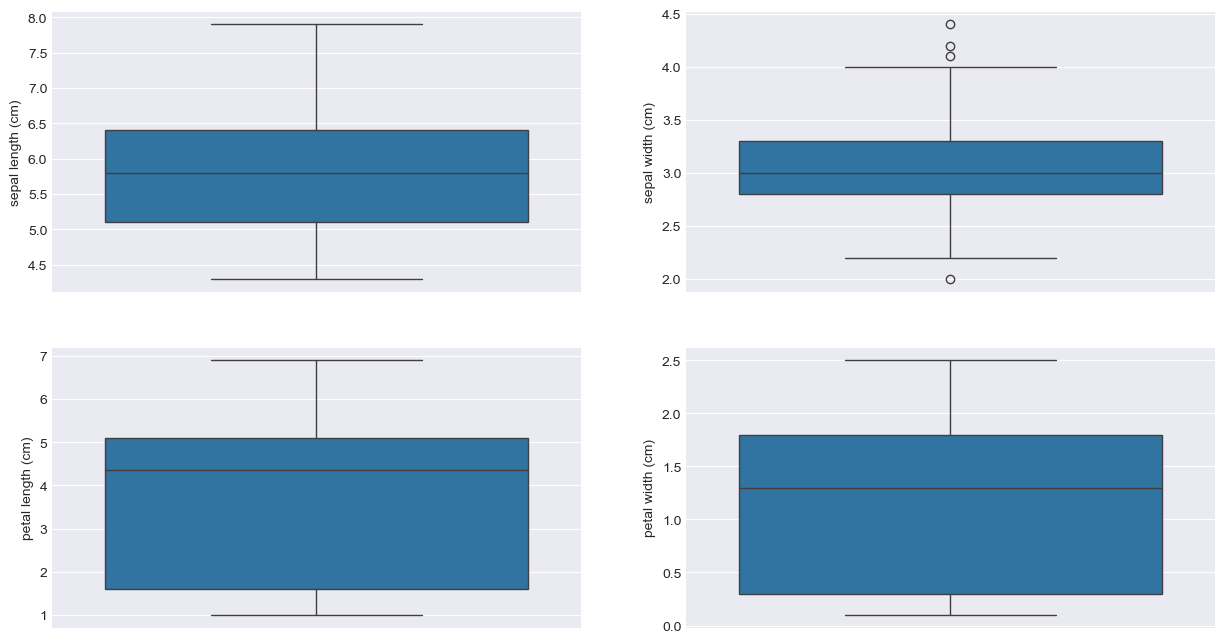

In [42]:
fig, axes = plt.subplots(2,2, figsize=(15,8))
axes=axes.flatten()

for count, ax in  enumerate(axes):

    sns.boxplot(y=features.columns[count], data=features, ax=ax)

<function matplotlib.pyplot.show(close=None, block=None)>

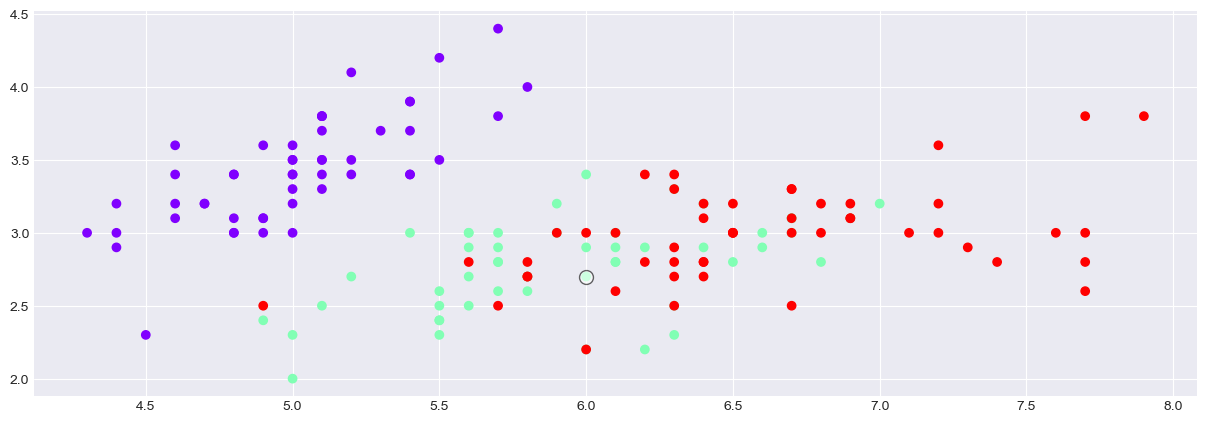

In [43]:
svm=SVC(kernel='rbf')

clf.fit(X,y)

y_pred = clf.predict(X)

xerr = X[:,0][y != y_pred]
yerr = X[:,1][y !=y_pred]
fig, ax=plt.subplots()

ax.scatter(X[:,0], X[:,1], c=y, cmap=CMAP)
ax.scatter(xerr, yerr, color = 'w', s=100, alpha=0.6, edgecolor='k', )

plt.show

## Parameteers

- Kernel
- C
- gamma

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_x = pca.fit_transform(X)
X.shape, pca_x.shape

((150, 4), (150, 2))

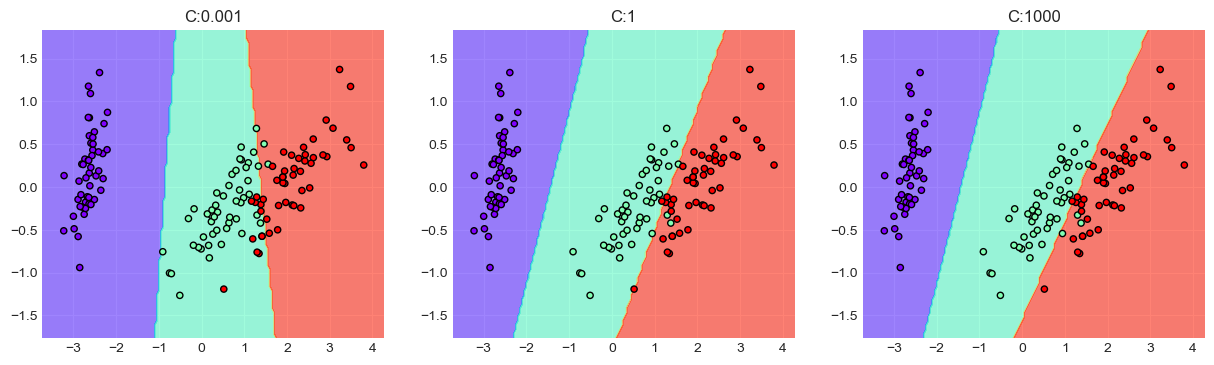

In [46]:
fig, axes= plt.subplots(1,3, figsize=(15,4))
C_value=[0.001,1, 1000]
i=0

for C in C_value:

    clf=SVC(kernel='linear', C=C)
    clf.fit(pca_x, y)
    ax = axes[i]
    fn_plot_decision_boundary(clf, pca_x, y, ax)
    i +=1
    ax.set_title(f'C:{C}')


In [47]:
xerr

array([6.])

In [48]:
yerr

array([2.7])

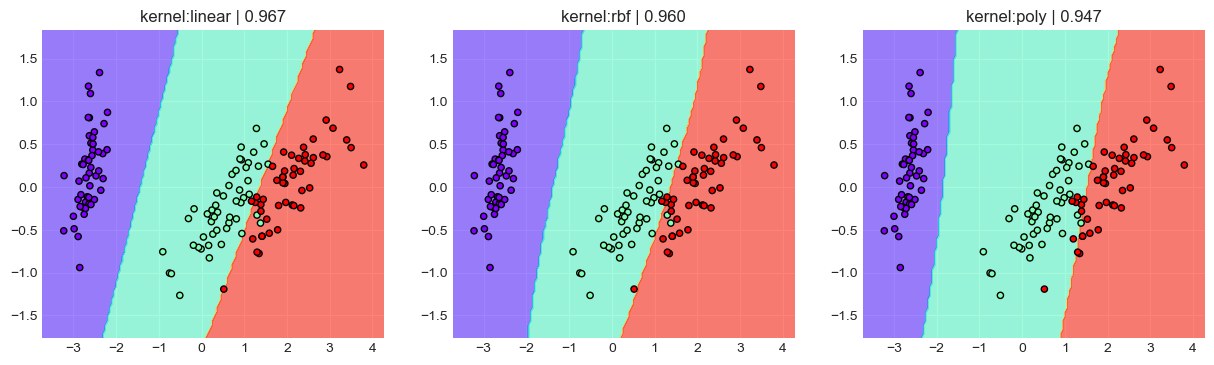

In [95]:
fig, axes= plt.subplots(1,3, figsize=(15,4))
kernels=['linear','rbf', 'poly']
i=0

for kernel in kernels:

    clf=SVC(kernel=kernel)
    clf.fit(pca_x, y)
    ax = axes[i]
    fn_plot_decision_boundary(clf, pca_x, y, ax)
    i +=1
    y_pred = clf.predict(pca_x)
    acc = accuracy_score(y_true=y, y_pred=y_pred)
    ax.set_title(f'kernel:{kernel} | {acc:0.3f}')


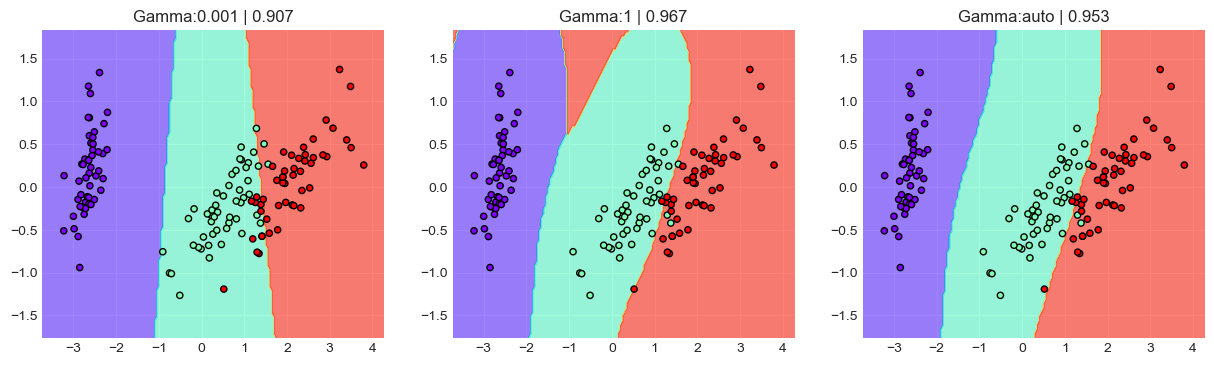

In [97]:
fig, axes= plt.subplots(1,3, figsize=(15,4))
gammas=[0.001,1, 'auto']
i=0

for g in gammas:

    clf=SVC(kernel='rbf', gamma=g)
    clf.fit(pca_x, y)
    ax = axes[i]
    fn_plot_decision_boundary(clf, pca_x, y, ax)
    i +=1
    y_pred = clf.predict(pca_x)
    acc = accuracy_score(y_true=y, y_pred=y_pred)
    ax.set_title(f'Gamma:{g} | {acc:0.3f}')

In [109]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X,y)

y_pred = clf.predict(X)

accuracy_score(y_true=y, y_pred=y_pred)

1.0